In [1]:
import numpy as np
import pandas as pd

In [2]:
#index_col = 0 make sure that the first column of the dataset will be use as index
#header = None exclude the first row as a header since the targets datasets dont 
# have headers (actually its has - the course mismatch something)

loan_data_inputs_train = pd.read_csv("loan_data_inputs_train.csv", index_col=0)
loan_data_targets_train = pd.read_csv("loan_data_targets_train.csv", index_col=0)
loan_data_inputs_test = pd.read_csv("loan_data_inputs_test.csv", index_col=0)
loan_data_targets_test = pd.read_csv("loan_data_targets_test.csv", index_col=0)

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.shape

(373028, 1)

In [5]:
loan_data_inputs_test.shape

(93257, 322)

In [6]:
loan_data_targets_test.shape

(93257, 1)

In [7]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:debt_consolidation',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [8]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'mths_since_last_delinq:0-3',
'dti:>35',
'mths_since_last_record:0-2'
]

In [9]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis=1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


# PD MODEL

Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [11]:
reg = LogisticRegression()

In [12]:
pd.options.display.max_rows = None

In [13]:
reg.fit(inputs_train, loan_data_targets_train)

c:\Users\SH623GL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\SH623GL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
reg.intercept_

array([-1.35379623])

In [15]:
reg.coef_

array([[ 1.11333774,  0.91550565,  0.71411689,  0.52514543,  0.33313578,
         0.13116759,  0.07780329,  0.08707304,  0.0370959 ,  0.07049536,
         0.06359707,  0.04136856,  0.07335723,  0.13476467,  0.10738127,
         0.1645263 ,  0.25610814,  0.22832288,  0.26303044,  0.31643449,
         0.51245932,  0.22083409,  0.22566294,  0.29671563,  0.34450864,
         0.06257657,  0.09042385,  0.11408297,  0.13592909,  0.10772681,
         0.07661805,  0.13612566,  1.48473446,  1.16435122,  1.00512232,
         0.7341822 ,  0.50382989,  0.21340339, -0.08310437,  0.9108163 ,
         0.53645998,  0.29911215,  0.09833522,  0.06511726,  0.03825738,
         0.08936132,  0.13017472,  0.1265621 ,  0.09208417,  0.06236195,
         0.68812931,  0.54130845,  0.31876382, -0.01683488, -0.11985655,
        -0.13528349, -0.15394237, -0.13141626, -0.1520276 , -0.19970224,
         0.1647957 ,  0.11431277, -0.03192704,  0.03902016,  0.15290716,
         0.04078702,  0.00270922, -0.00464304,  0.0

In [16]:
feature_name = inputs_train.columns.values

In [17]:
summary_table = pd.DataFrame(columns = ['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
#Adding the 'Intercept' on the first row
summary_table.index = summary_table.index + 1 #move all the table content one row down
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table



,Feature Name,Coefficients
0,Intercept,-1.353796
1,grade:A,1.113338
2,grade:B,0.915506
3,grade:C,0.714117
4,grade:D,0.525145
5,grade:E,0.333136
6,grade:F,0.131168
7,home_ownership:OWN,0.077803
8,home_ownership:MORTGAGE,0.087073
9,addr_state:NM_VA,0.037096


# Building a Logistic Regression with P-Values

Since que need p-Values to evaluate if the variables are in a good fit to the model and sklearn dont have a build in solution to calculate it, we will need to create it ourselves

In [18]:
#DONT FORGET TO INCREASE THE max_iter PARAMETER, ELSE THE MODEL WILL FAIL
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs, max_iter=10000)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 + (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) *2 for x in z_scores]
        self_coef = self.model.coef_
        self_intercept = self.model.intercept_
        self.p_values = p_values

In [19]:
reg = LogisticRegression_with_p_values()

In [20]:
reg.fit(inputs_train, loan_data_targets_train)

c:\Users\SH623GL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
summary_table = pd.DataFrame(columns = ['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.model.coef_)
#Adding the 'Intercept' on the first row
summary_table.index = summary_table.index + 1 #move all the table content one row down
summary_table.loc[0] = ['Intercept', reg.model.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-1.764039
1,grade:A,1.087495
2,grade:B,0.894372
3,grade:C,0.695385
4,grade:D,0.508272
5,grade:E,0.321961
6,grade:F,0.122764
7,home_ownership:OWN,0.077988
8,home_ownership:MORTGAGE,0.087427
9,addr_state:NM_VA,0.037601


In [22]:
p_values = reg.p_values

In [23]:
p_values = np.append(np.nan, np.array(p_values))

In [24]:
summary_table['p_values'] = p_values

In [25]:
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-1.764039,NaN
1,grade:A,1.087495,1.611172e-40
2,grade:B,0.894372,1.177102e-54
3,grade:C,0.695385,3.603980e-38
4,grade:D,0.508272,5.290340e-23
5,grade:E,0.321961,3.877805e-12
6,grade:F,0.122764,1.127945e-02
7,home_ownership:OWN,0.077988,1.491528e-05
8,home_ownership:MORTGAGE,0.087427,1.017825e-14
9,addr_state:NM_VA,0.037601,1.910815e-01


AFTER EVALUATING THE P-VALUE WE REMOVE SOME VARIABLES WITH P-VALUE GREATER THAN 0.05

In [253]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86']]

In [254]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'verification_status:Verified',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [255]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
427211,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [256]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

c:\Users\SH623GL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [257]:
feature_name = inputs_train.columns.values

In [258]:
summary_table = pd.DataFrame(columns = ['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.model.coef_[0])
#Adding the 'Intercept' on the first row
summary_table.index = summary_table.index + 1 #move all the table content one row down
summary_table.loc[0] = ['Intercept', reg2.model.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-1.288933
1,grade:A,1.112105
2,grade:B,0.907033
3,grade:C,0.708617
4,grade:D,0.519666
5,grade:E,0.330585
6,grade:F,0.130415
7,home_ownership:OWN,0.080460
8,home_ownership:MORTGAGE,0.086718
9,addr_state:NM_VA,0.038613


In [259]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-1.288933,NaN
1,grade:A,1.112105,7.023283e-43
2,grade:B,0.907033,3.046747e-57
3,grade:C,0.708617,1.742855e-40
4,grade:D,0.519666,1.164785e-24
5,grade:E,0.330585,2.612619e-13
6,grade:F,0.130415,5.627069e-03
7,home_ownership:OWN,0.080460,7.630417e-06
8,home_ownership:MORTGAGE,0.086718,1.368789e-14
9,addr_state:NM_VA,0.038613,1.788284e-01


In [260]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86']]

In [261]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'verification_status:Verified',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [262]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [263]:
y_hat_test = reg2.model.predict(inputs_test)

In [264]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [265]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [266]:
#the first element is the Probability of default and the second is the probability of non-default
y_hat_test_proba

array([[0.06143018, 0.93856982],
       [0.11743679, 0.88256321],
       [0.11006693, 0.88993307],
       ...,
       [0.02336344, 0.97663656],
       [0.03611531, 0.96388469],
       [0.04564965, 0.95435035]])

In [267]:
#To analyse the model performance we need only the probability of non-default to do so we get the 
# second element of the array
y_hat_test_proba[: ][:, 1]

array([0.93856982, 0.88256321, 0.88993307, ..., 0.97663656, 0.96388469,
       0.95435035])

In [268]:
y_hat_test_proba = y_hat_test_proba[: ][:, 1]

In [269]:
loan_data_targets_test_temp = loan_data_targets_test

In [270]:
loan_data_targets_test_temp.reset_index(drop=True, inplace=True)

In [271]:
# for convinience que put the actual probabilities and the good_bad variable in one dataframe
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis=1)

In [272]:
df_actual_predicted_probs.shape

(93257, 2)

In [273]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [274]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [275]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.938570
288564,1,0.882563
213591,1,0.889933
263083,1,0.961003
165001,1,0.970359


Accuracy and Area under the curve

In [276]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [277]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames= ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,6010,3017
1,29752,54478


In [278]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames= ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.064446,0.032351
1,0.319032,0.584171


In [279]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames= ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames= ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.6486161896694083

In [280]:
from sklearn.metrics import roc_curve, roc_auc_score

In [281]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99988922, 0.99988922,
        1.        ]),
 array([0.00000000e+00, 1.18722545e-05, 8.31057818e-05, ...,
        9.99976255e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99533681, 0.99533681, 0.99425751, ..., 0.43099948, 0.39128956,
        0.3676164 ]))

In [282]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC Curve')

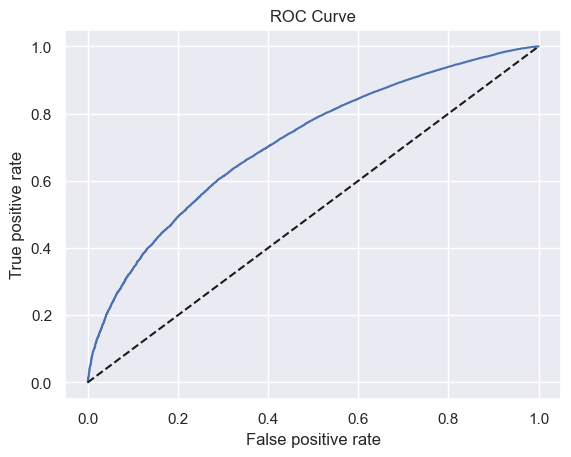

In [284]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

In [285]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7138892120977682

Gini and Kolmorov-Smirnov

In [286]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [287]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
39810,0,0.367616,0
42341,1,0.391290,0
42344,1,0.419917,0
40518,0,0.430999,0
40173,0,0.447301,0


In [288]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
248059,1,0.994329,1
231463,1,0.994366,1
239228,1,0.994793,1
261086,1,0.994870,1
242624,1,0.995337,1


In [289]:
#reset the index and store the old index in a new column, the old index is useful in case we need to connect
#this dataframe with another
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [290]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,39810,0,0.367616,0
1,42341,1,0.391290,0
2,42344,1,0.419917,0
3,40518,0,0.430999,0
4,40173,0,0.447301,0


In [291]:
# We need:
# 1 - the cumulative % of the total population
# 2 - The cumulative % of good borrowers
# 3 - The cumulative % of bad borrowers

df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [292]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,39810,0,0.367616,0,1,0,1
1,42341,1,0.391290,0,2,1,1
2,42344,1,0.419917,0,3,2,1
3,40518,0,0.430999,0,4,2,2
4,40173,0,0.447301,0,5,2,3


In [293]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

Text(0.5, 1.0, 'Gini')

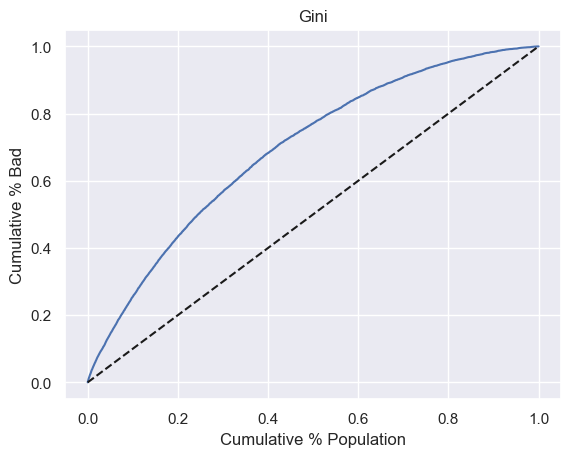

In [294]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle='--', color='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [295]:
Gini = AUROC *2 -1
Gini

0.42777842419553647

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

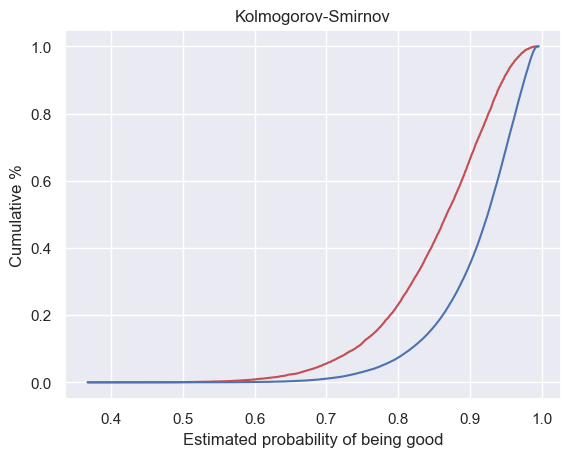

In [296]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated probability of being good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [297]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.3146040975310379

Creating a Scorecard

In [298]:
#Adding back the reference categories in the model
df_ref_categories = pd.DataFrame(ref_categories, columns=['Feature Name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature Name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
4,initial_list_status:f,0,NaN
5,term:60,0,NaN
6,emp_length:0,0,NaN
7,mths_since_issue_d:>84,0,NaN
8,int_rate:>20.281,0,NaN
9,verification_status:Verified,0,NaN


In [299]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature Name,Coefficients,p_values
0,0,Intercept,-1.288933,NaN
1,1,grade:A,1.112105,7.023283e-43
2,2,grade:B,0.907033,3.046747e-57
3,3,grade:C,0.708617,1.742855e-40
4,4,grade:D,0.519666,1.164785e-24
5,5,grade:E,0.330585,2.612619e-13
6,6,grade:F,0.130415,5.627069e-03
7,7,home_ownership:OWN,0.080460,7.630417e-06
8,8,home_ownership:MORTGAGE,0.086718,1.368789e-14
9,9,addr_state:NM_VA,0.038613,1.788284e-01


In [300]:
df_scorecard['Original feature name'] = df_scorecard['Feature Name'].str.split(':').str[0]

In [301]:
df_scorecard

,index,Feature Name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.288933,NaN,Intercept
1,1,grade:A,1.112105,7.023283e-43,grade
2,2,grade:B,0.907033,3.046747e-57,grade
3,3,grade:C,0.708617,1.742855e-40,grade
4,4,grade:D,0.519666,1.164785e-24,grade
5,5,grade:E,0.330585,2.612619e-13,grade
6,6,grade:F,0.130415,5.627069e-03,grade
7,7,home_ownership:OWN,0.080460,7.630417e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.086718,1.368789e-14,home_ownership
9,9,addr_state:NM_VA,0.038613,1.788284e-01,addr_state


In [302]:
min_score = 300
max_score = 850

In [303]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.288933
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.028053
dti                           -0.000132
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.056421
mths_since_last_delinq         0.000000
mths_since_last_record        -0.054896
purpose                        0.000000
term                           0.000000
verification_status           -0.003954
Name: Coefficients, dtype: float64

In [304]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()

In [305]:
min_sum_coef

-1.4323896123014725

In [306]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()

In [307]:
max_sum_coef

6.06826829705656

In [308]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature Name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.288933,NaN,Intercept,-94.513484
1,1,grade:A,1.112105,7.023283e-43,grade,81.547226
2,2,grade:B,0.907033,3.046747e-57,grade,66.509913
3,3,grade:C,0.708617,1.742855e-40,grade,51.960684
4,4,grade:D,0.519666,1.164785e-24,grade,38.105499
5,5,grade:E,0.330585,2.612619e-13,grade,24.240740
6,6,grade:F,0.130415,5.627069e-03,grade,9.562893
7,7,home_ownership:OWN,0.080460,7.630417e-06,home_ownership,5.899859
8,8,home_ownership:MORTGAGE,0.086718,1.368789e-14,home_ownership,6.358779
9,9,addr_state:NM_VA,0.038613,1.788284e-01,addr_state,2.831369


In [309]:
df_scorecard['Score - Calculation'][0]  = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\SH623GL\AppData\Local\Temp\ipykernel_11756\3925121009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0]  = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature Name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.288933,NaN,Intercept,310.519207
1,1,grade:A,1.112105,7.023283e-43,grade,81.547226
2,2,grade:B,0.907033,3.046747e-57,grade,66.509913
3,3,grade:C,0.708617,1.742855e-40,grade,51.960684
4,4,grade:D,0.519666,1.164785e-24,grade,38.105499
5,5,grade:E,0.330585,2.612619e-13,grade,24.240740
6,6,grade:F,0.130415,5.627069e-03,grade,9.562893
7,7,home_ownership:OWN,0.080460,7.630417e-06,home_ownership,5.899859
8,8,home_ownership:MORTGAGE,0.086718,1.368789e-14,home_ownership,6.358779
9,9,addr_state:NM_VA,0.038613,1.788284e-01,addr_state,2.831369


In [310]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature Name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.288933,NaN,Intercept,310.519207,311.0
1,1,grade:A,1.112105,7.023283e-43,grade,81.547226,82.0
2,2,grade:B,0.907033,3.046747e-57,grade,66.509913,67.0
3,3,grade:C,0.708617,1.742855e-40,grade,51.960684,52.0
4,4,grade:D,0.519666,1.164785e-24,grade,38.105499,38.0
5,5,grade:E,0.330585,2.612619e-13,grade,24.240740,24.0
6,6,grade:F,0.130415,5.627069e-03,grade,9.562893,10.0
7,7,home_ownership:OWN,0.080460,7.630417e-06,home_ownership,5.899859,6.0
8,8,home_ownership:MORTGAGE,0.086718,1.368789e-14,home_ownership,6.358779,6.0
9,9,addr_state:NM_VA,0.038613,1.788284e-01,addr_state,2.831369,3.0


In [311]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel


301.0

In [312]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

849.0

Calculating a Credit Score

In [313]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [314]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [315]:
#df.insert(index, column name, values) => adds a new column to the dataframe in a position, determined by index (the position),
#with a specific name and value
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [316]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [317]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature Name'].values]

In [318]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,mths_since_issue_d:>84,int_rate:>20.281,verification_status:Verified,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [319]:
scorecard_scores = df_scorecard['Score - Preliminary']

In [320]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 101)

In [321]:
scorecard_scores.shape

(101,)

In [322]:
scorecard_scores = scorecard_scores.values.reshape(101, 1)

In [323]:
scorecard_scores.shape

(101, 1)

In [324]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [325]:
y_scores.head()

,0
362514,605.0
288564,553.0
213591,557.0
263083,640.0
165001,659.0


Turn The score in a probability

In [326]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [327]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.938605
288564,0.882665
213591,0.888198
263083,0.960999
165001,0.969631


In [328]:
y_hat_test_proba[0: 5]

array([0.93856982, 0.88256321, 0.88993307, 0.96100286, 0.97035898])

In [329]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [330]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames= ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,6010,3017
1,29752,54478


In [331]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames= ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.064446,0.032351
1,0.319032,0.584171


In [332]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames= ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames= ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.6486161896694083

In [333]:
from sklearn.metrics import roc_curve, roc_auc_score

In [334]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99988922, 0.99988922,
        1.        ]),
 array([0.00000000e+00, 1.18722545e-05, 8.31057818e-05, ...,
        9.99976255e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99533681, 0.99533681, 0.99425751, ..., 0.43099948, 0.39128956,
        0.3676164 ]))

In [335]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC Curve')

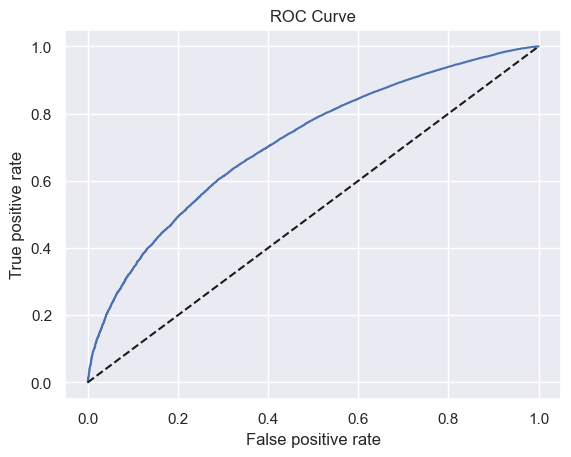

In [337]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

In [338]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7138892120977682

In [339]:
thresholds

array([1.99533681, 0.99533681, 0.99425751, ..., 0.43099948, 0.39128956,
       0.3676164 ])

In [340]:
thresholds.shape

(15630,)

In [341]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)

In [342]:
df_cutoffs.columns = ['thresholds', 'frp', 'tpr']

In [343]:
df_cutoffs.head()

,thresholds,frp,tpr
0,1.995337,0.000000,0.000000
1,0.995337,0.000000,0.000012
2,0.994258,0.000000,0.000083
3,0.994160,0.000111,0.000083
4,0.993284,0.000111,0.000439


In [344]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [345]:
df_cutoffs.head()

,thresholds,frp,tpr
0,1.000000,0.000000,0.000000
1,0.995337,0.000000,0.000012
2,0.994258,0.000000,0.000083
3,0.994160,0.000111,0.000083
4,0.993284,0.000111,0.000439


In [346]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [347]:
df_cutoffs.head()

,thresholds,frp,tpr,Score
0,1.000000,0.000000,0.000000,1971.0
1,0.995337,0.000000,0.000012,798.0
2,0.994258,0.000000,0.000083,783.0
3,0.994160,0.000111,0.000083,782.0
4,0.993284,0.000111,0.000439,771.0


In [348]:
df_cutoffs['Score'][0] = max_score

In [349]:
df_cutoffs.head()

,thresholds,frp,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.995337,0.000000,0.000012,798.0
2,0.994258,0.000000,0.000083,783.0
3,0.994160,0.000111,0.000083,782.0
4,0.993284,0.000111,0.000439,771.0


In [350]:
df_cutoffs.tail()

,thresholds,frp,tpr,Score
15625,0.489855,0.999668,0.999953,402.0
15626,0.472969,0.999668,0.999976,397.0
15627,0.430999,0.999889,0.999976,385.0
15628,0.391290,0.999889,1.000000,373.0
15629,0.367616,1.000000,1.000000,365.0


In [351]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [352]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate']  = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [353]:
df_cutoffs.head()

,thresholds,frp,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.995337,0.000000,0.000012,798.0,1,93256,0.000011,0.999989
2,0.994258,0.000000,0.000083,783.0,7,93250,0.000075,0.999925
3,0.994160,0.000111,0.000083,782.0,8,93249,0.000086,0.999914
4,0.993284,0.000111,0.000439,771.0,38,93219,0.000407,0.999593


In [354]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [ ]:
df_scorecard.to_csv('df_scorecard.csv')

Population Stability Index (PSI)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
loan_data_inputs_train = pd.read_csv("loan_data_inputs_train.csv", index_col=0)
loan_data_targets_train = pd.read_csv("loan_data_targets_train.csv", index_col=0)
loan_data_inputs_test = pd.read_csv("loan_data_inputs_test.csv", index_col=0)
loan_data_targets_test = pd.read_csv("loan_data_targets_test.csv", index_col=0)

In [ ]:
import pickle


In [ ]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))